## Building the image showing the results of an experiment

In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

from skimage.io import imsave, imread
from skimage.transform import rescale, resize
from skimage.measure import compare_ssim, compare_psnr

from sklearn.metrics import mean_absolute_error

In [2]:
PATH_TO_IMG = 'C:\\Users\\Мария\\Desktop\\dl_bia_project\\images\\images'
RANDOM_STATE = 42

In [3]:
images_bicubic = [os.path.join(PATH_TO_IMG, 'bicubic', file) for file in os.listdir(os.path.join(PATH_TO_IMG, 'bicubic')) if file.endswith('.png')]
images_srgan = [os.path.join(PATH_TO_IMG, 'srgan', file) for file in os.listdir(os.path.join(PATH_TO_IMG, 'srgan')) if file.endswith('.png')]
images_resnet = [os.path.join(PATH_TO_IMG, 'srresnet', file) for file in os.listdir(os.path.join(PATH_TO_IMG, 'srresnet')) if file.endswith('.png')]
images_our = [os.path.join(PATH_TO_IMG, 'our', file) for file in os.listdir(os.path.join(PATH_TO_IMG, 'our')) if file.endswith('.png')]


images_bicubic = sorted(images_bicubic)
images_srgan = sorted(images_srgan)
images_resnet = sorted(images_resnet)
images_our = sorted(images_our)
# print(images_our)

images_bicubic = [imread(i, as_grey=True) for i in images_bicubic]
images_bicubic = [i/i.max() for i in images_bicubic]
images_bicubic.insert(1, np.zeros_like(images_bicubic[0]))


images_srgan = [imread(i, as_grey=True) for i in images_srgan]
images_srgan = [i/i.max() for i in images_srgan]
images_srgan.insert(1, np.zeros_like(images_srgan[0]))

images_resnet = [imread(i, as_grey=True) for i in images_resnet]
images_resnet = [i/i.max() for i in images_resnet]
images_resnet.insert(1, np.zeros_like(images_resnet[0]))

images_our = [imread(i, as_grey=True) for i in images_our]
images_our = [i/i.max() for i in images_our]
images_our.insert(1, np.zeros_like(images_our[0]))

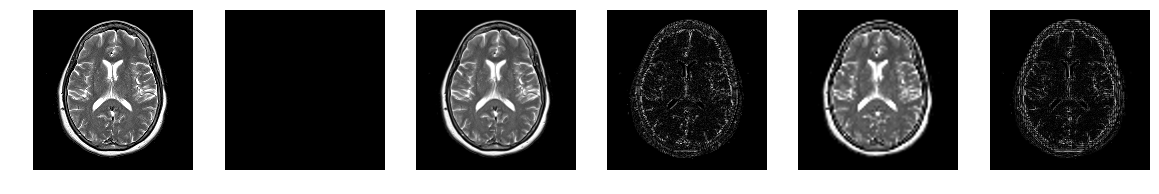

In [4]:
fig, axs = plt.subplots(1, 6, figsize=(20,4))
    
axs[0].imshow(images_bicubic[0], cmap='gray')
axs[0].axis('off')
axs[1].imshow(images_bicubic[1], cmap='gray')
axs[1].axis('off')
axs[2].imshow(images_bicubic[2], cmap='gray')
axs[2].axis('off')
axs[3].imshow(images_bicubic[3], cmap='gray')
axs[3].axis('off')
axs[4].imshow(images_bicubic[4], cmap='gray')
axs[4].axis('off')

axs[5].imshow(images_bicubic[5], cmap='gray')
axs[5].axis('off')

plt.show()

C:\Program Files\Python\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


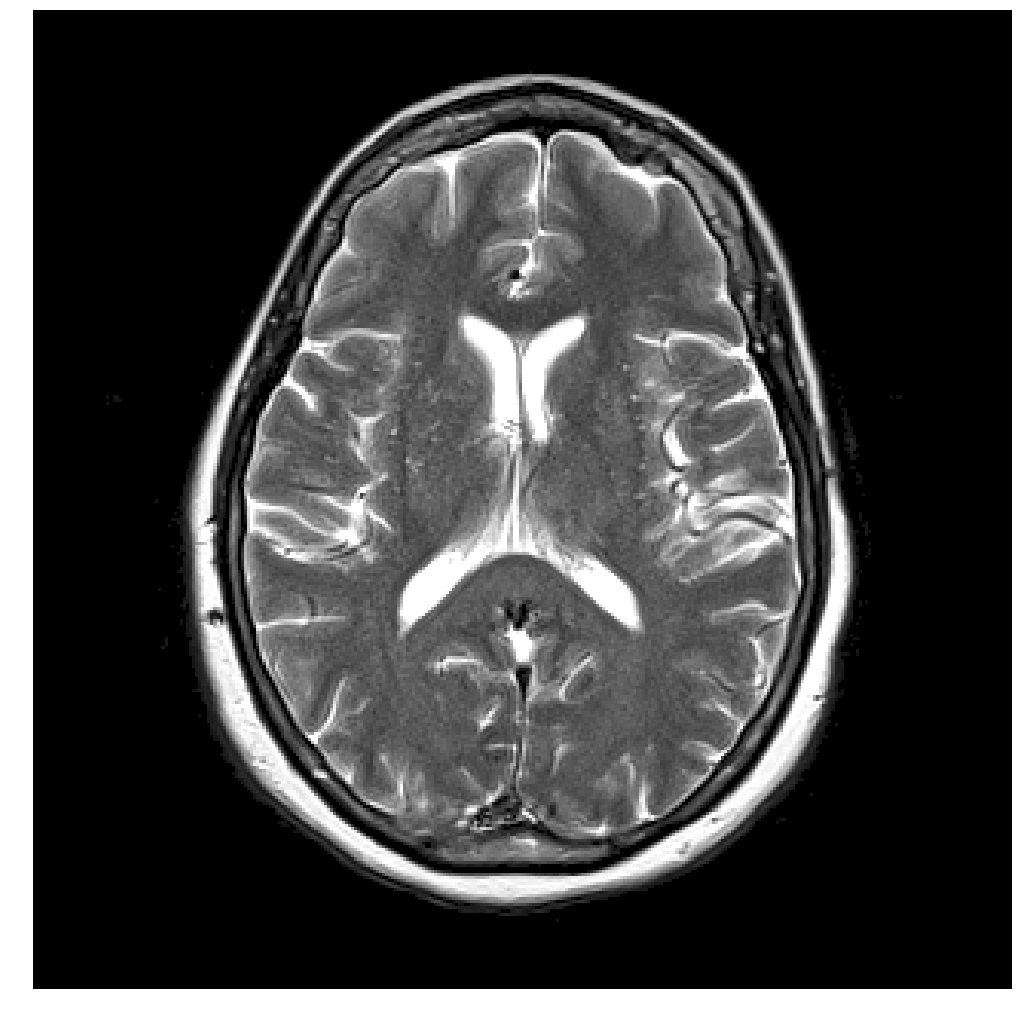

In [5]:
plt.figure(figsize=(18, 18))
plt.imshow(images_bicubic[0], cmap='gray')
# plt.xlabel("x2, x4 upscaling", fontsize=15)
# plt.ylabel("Methods", fontsize=15)
plt.axis('off')
imsave('origin.png', images_bicubic[0])

In [6]:
def crop(img, corners):
    l, r, t, b = corners
    return img[t:b, l:r]


def create_zoom(img, diff, corners):
    out = np.concatenate((crop(diff, corners), crop(img, corners)), axis=0)
    out = resize(out, (320, 160), preserve_range=True)

    return out

def create_sample(img, diff, corners):
    zoom = create_zoom(img, diff, corners)
    sample = np.concatenate((img, zoom), axis=1)

    return sample

def create_comparation(images, corners, start_i=2, last_i=6):
    samples = []
    for i in range(start_i, last_i, 2):
        sample = create_sample(images[i], images[i+1], corners)
        samples.append(sample)

    out = np.concatenate(samples, axis=1)

    return out

C:\Program Files\Python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(320, 960)


(-0.5, 959.5, 1279.5, -0.5)

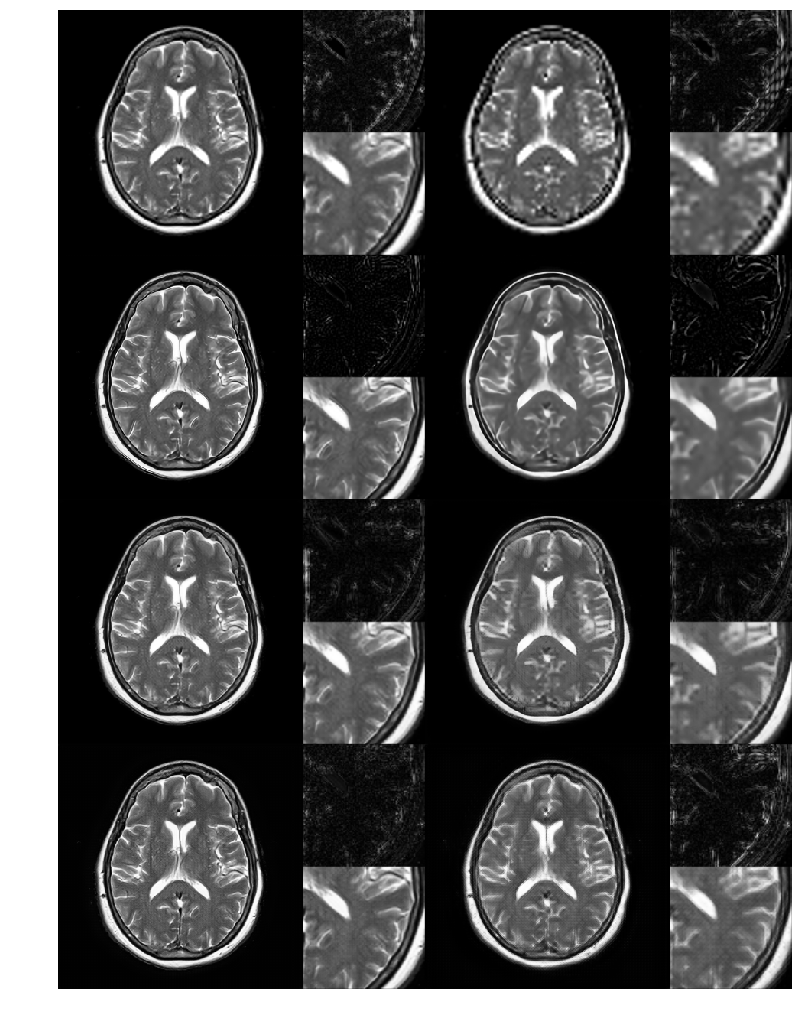

In [7]:
corners = [160, 260, 160, 260]

bicubic_comparation = create_comparation(images_bicubic, corners, start_i=2,  last_i=6)
resnet_comparation = create_comparation(images_resnet, corners, start_i=2, last_i=6)
srgan_comparation = create_comparation(images_srgan, corners, start_i=2, last_i=6)
our_comparation = create_comparation(images_our, corners, start_i=2, last_i=6)


print(bicubic_comparation.shape)
comp = np.concatenate((bicubic_comparation, resnet_comparation, srgan_comparation, our_comparation), axis=0)

plt.figure(figsize=(18, 18))
plt.imshow(comp, cmap='gray')
plt.xlabel("x2, x4 upscaling", fontsize=15)
plt.ylabel("Methods", fontsize=15)
plt.axis('off')
# imsave('result.png', comp)